# Импорт библиотек

In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

sns.set_theme(style="whitegrid")

# Загрузка данных

In [85]:
df = pd.read_csv("BankNote_Authentication.csv")

In [86]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Разведочный анализ данных (EDA)

## Общий анализ признаков

In [87]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [88]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<Figure size 2250x1200 with 0 Axes>

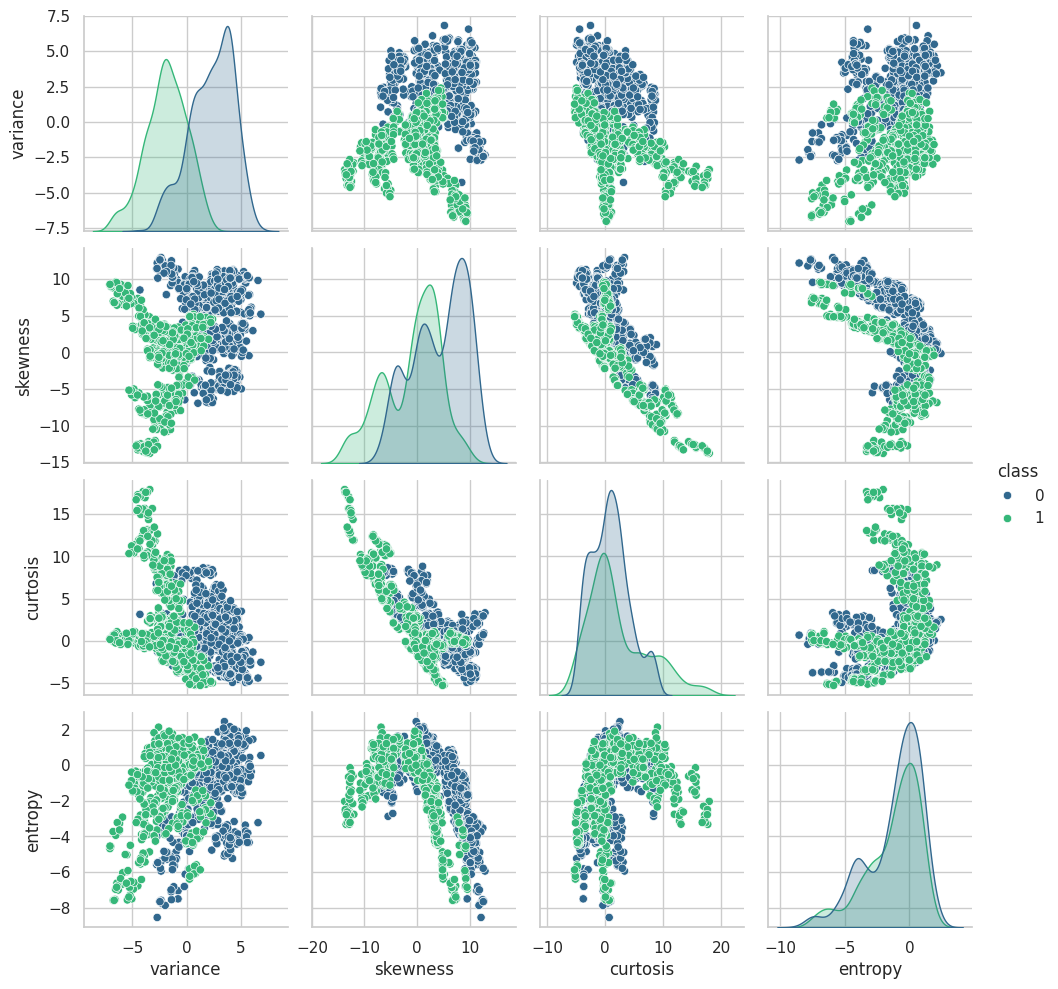

In [89]:
plt.figure(figsize=(15,8), dpi=150)
sns.pairplot(df, hue="class", palette="viridis")
plt.show()

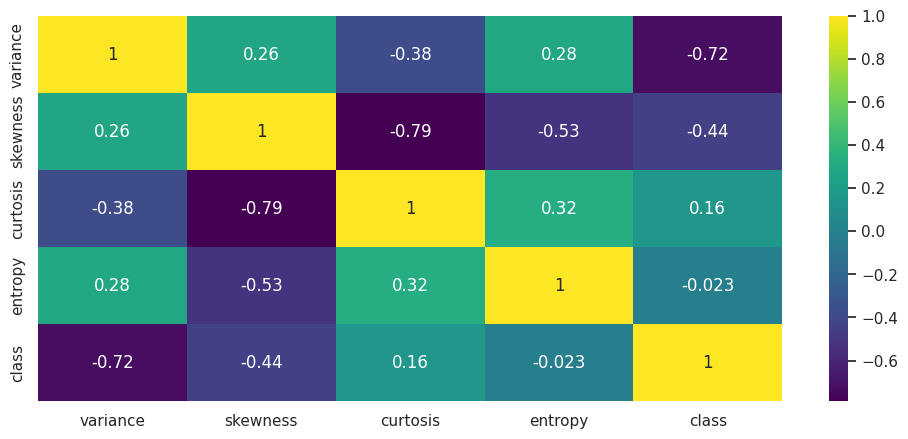

In [90]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

## Анализ целевой переменной "class"

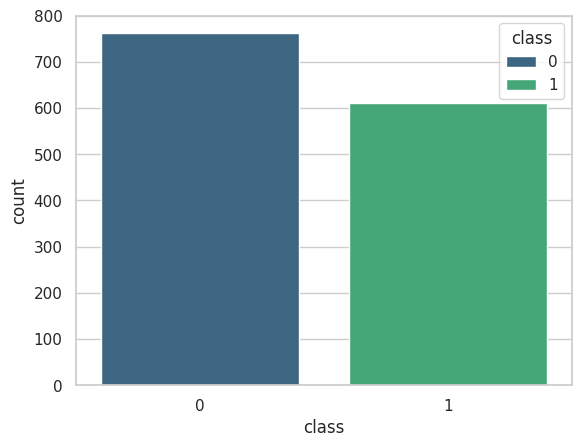

In [91]:
sns.countplot(x='class', data=df, palette='viridis', hue='class')
plt.show()

## Анализ признака "variance"

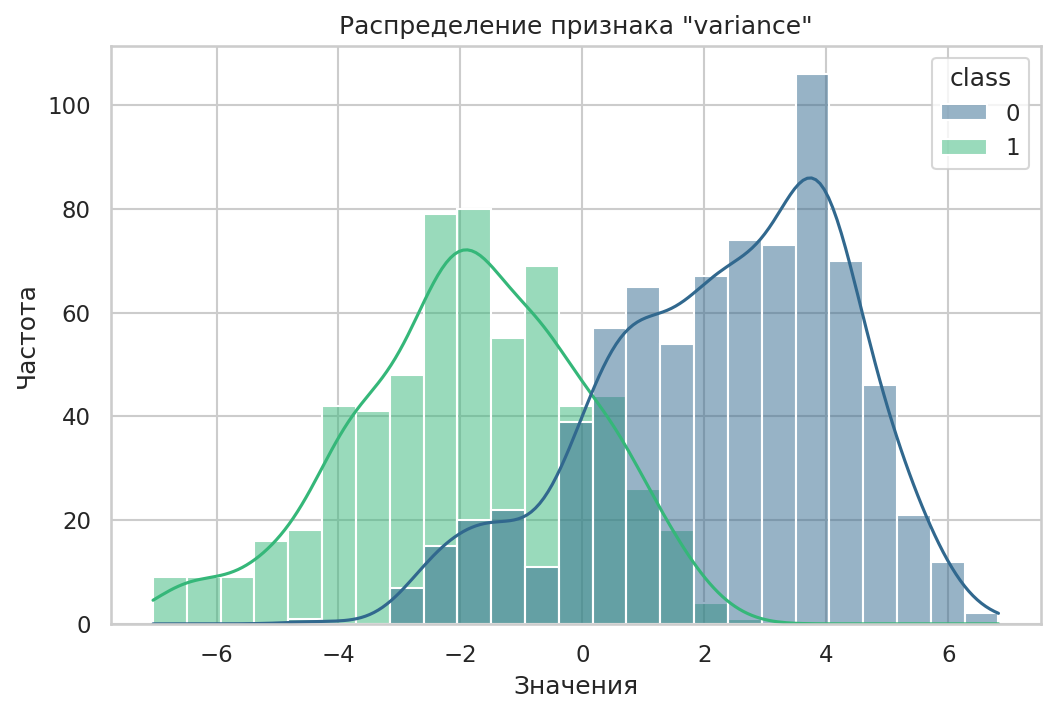

In [92]:
plt.figure(figsize=(8,5),dpi=150)
sns.histplot(data=df,x="variance", palette='viridis', hue='class', bins=25, kde=True)
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.title('Распределение признака "variance"')
plt.show()

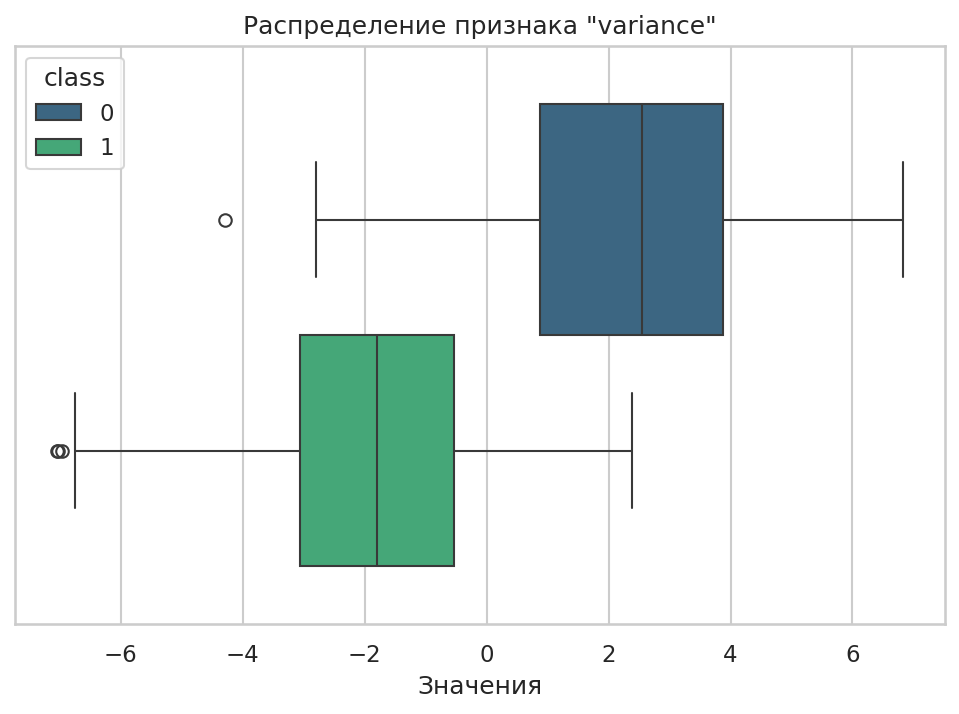

In [93]:
plt.figure(figsize=(8,5),dpi=150)
sns.boxplot(data=df,x="variance", palette='viridis', hue='class')
plt.xlabel("Значения")
plt.title('Распределение признака "variance"')
plt.show()

## Анализ признака "skewness"

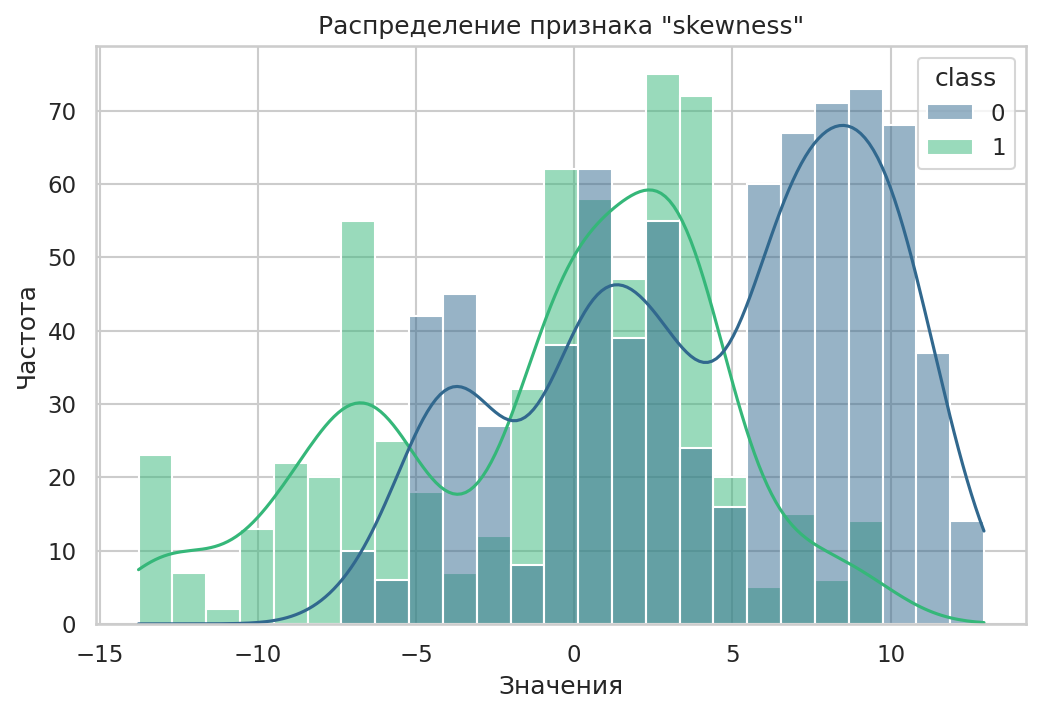

In [94]:
plt.figure(figsize=(8,5),dpi=150)
sns.histplot(data=df,x="skewness", palette='viridis', hue='class', bins=25, kde=True)
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.title('Распределение признака "skewness"')
plt.show()

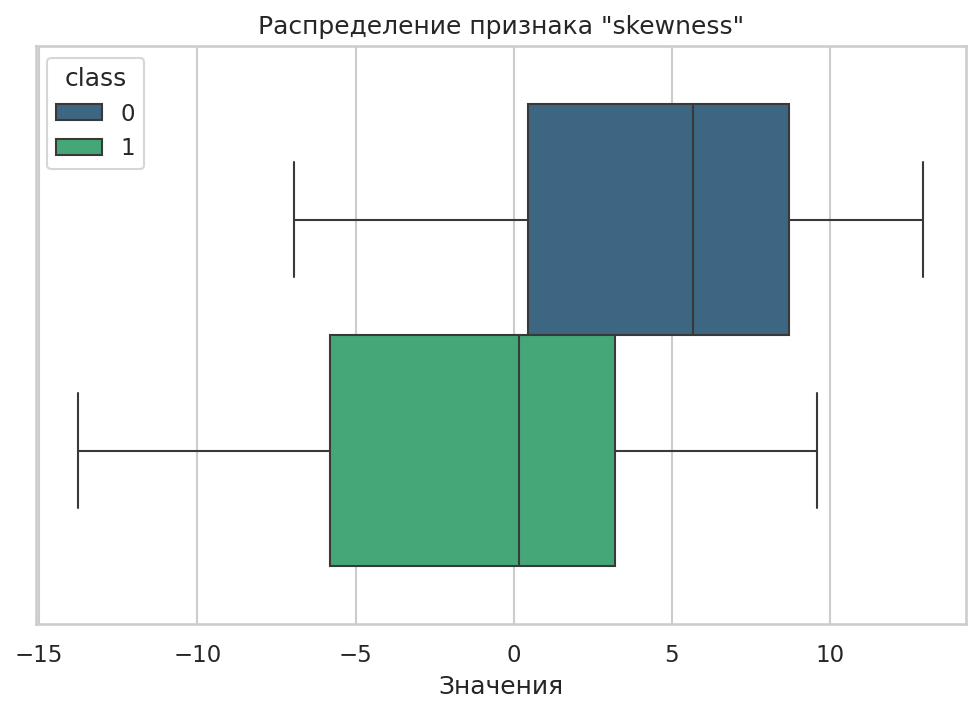

In [95]:
plt.figure(figsize=(8,5),dpi=150)
sns.boxplot(data=df,x="skewness", palette='viridis', hue='class')
plt.xlabel("Значения")
plt.title('Распределение признака "skewness"')
plt.show()

## Анализ признака "curtosis"

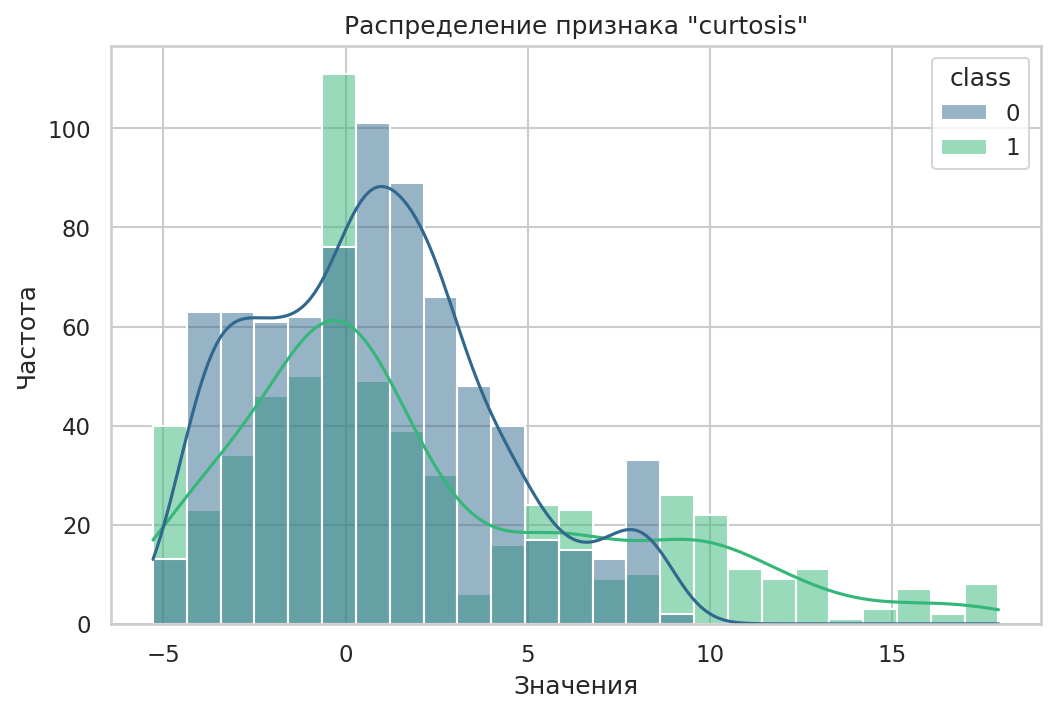

In [96]:
plt.figure(figsize=(8,5),dpi=150)
sns.histplot(data=df,x="curtosis", palette='viridis', hue='class', bins=25, kde=True)
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.title('Распределение признака "curtosis"')
plt.show()

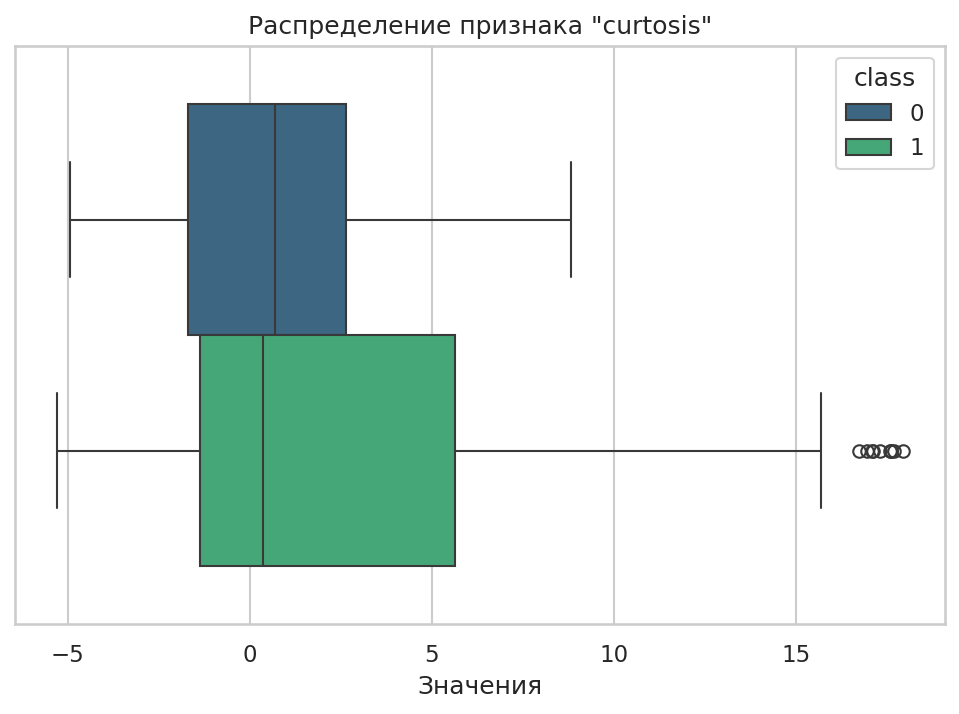

In [97]:
plt.figure(figsize=(8,5),dpi=150)
sns.boxplot(data=df,x="curtosis", palette='viridis', hue='class')
plt.xlabel("Значения")
plt.title('Распределение признака "curtosis"')
plt.show()

## Анализ признака "entropy"

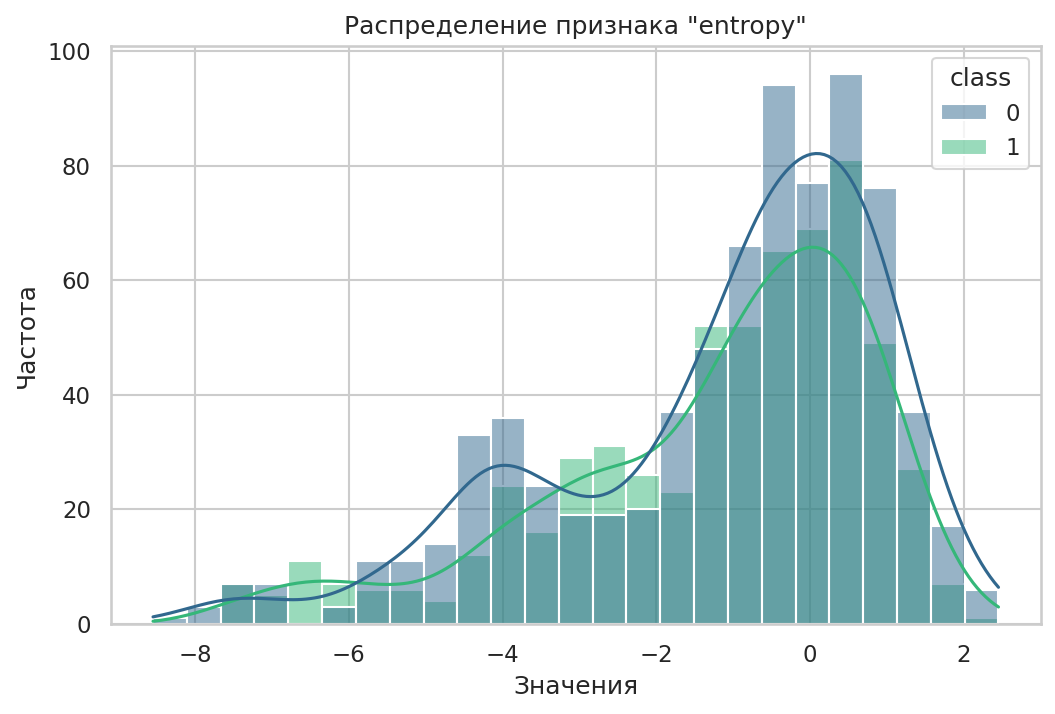

In [98]:
plt.figure(figsize=(8,5),dpi=150)
sns.histplot(data=df,x="entropy", palette='viridis', hue='class', bins=25, kde=True)
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.title('Распределение признака "entropy"')
plt.show()

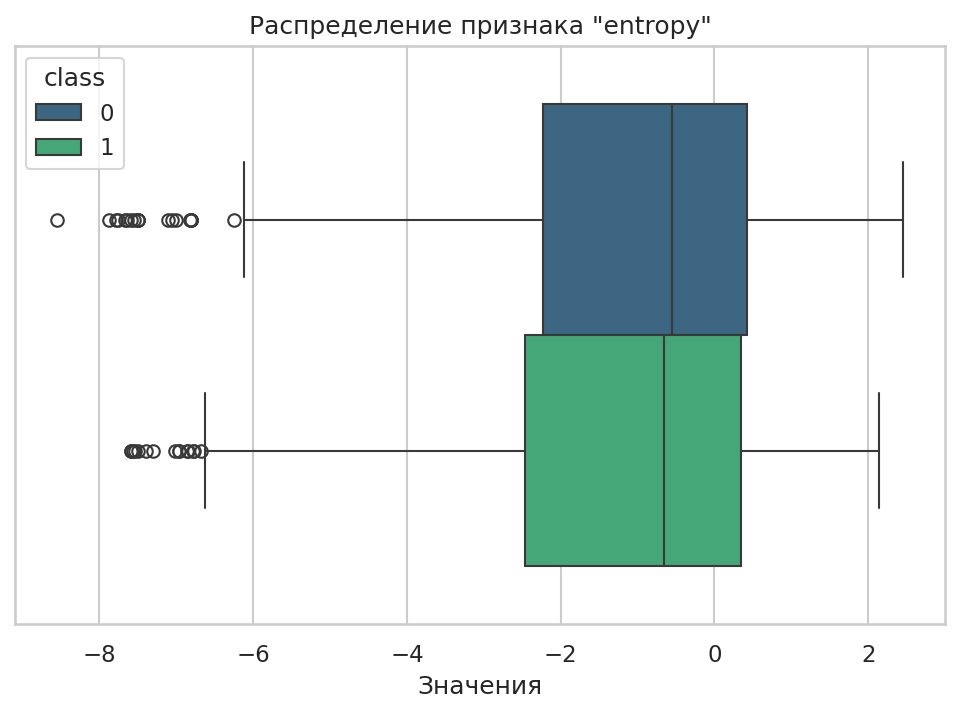

In [99]:
plt.figure(figsize=(8,5),dpi=150)
sns.boxplot(data=df,x="entropy", palette='viridis', hue='class')
plt.xlabel("Значения")
plt.title('Распределение признака "entropy"')
plt.show()

# Конструирование модели

## Подготовка данных

In [100]:
X = df.drop(['class'],axis=1)
y = df['class']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [102]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Логистическая регрессия

In [103]:
logreg_model = LogisticRegression()
logreg_param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

logreg_grid = GridSearchCV(logreg_model,logreg_param_grid,cv=5,n_jobs=-1,scoring="accuracy")
logreg_grid.fit(scaled_X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'max_iter': [1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [104]:
logreg_grid.best_params_

{'C': np.float64(2.782559402207126),
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [105]:
logreg_grid_pred = logreg_grid.predict(scaled_X_test)

In [106]:
confusion_matrix(y_test,logreg_grid_pred)

array([[143,   3],
       [  1, 128]])

In [107]:
print(classification_report(y_test,logreg_grid_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       146
           1       0.98      0.99      0.98       129

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [135]:
logreg_best_score = logreg_grid.best_score_

## SVM

In [110]:
svc_model = SVC()
svc_param_grid = [
    {
        'kernel': ['linear'],
        'C': np.logspace(-3, 3, 7)
    },
    {
        'kernel': ['rbf'],
        'C': np.logspace(-3, 3, 7),
        'gamma': np.logspace(-4, 1, 6)
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }
]

svc_grid = GridSearchCV(svc_model,svc_param_grid,cv=5,n_jobs=-1,scoring="accuracy")
svc_grid.fit(scaled_X_train, y_train)

,estimator,SVC()
,param_grid,"[{'C': array([1.e-03...e+02, 1.e+03]), 'kernel': ['linear']}, {'C': array([1.e-03...e+02, 1.e+03]), 'gamma': array([1.e-04...e+00, 1.e+01]), 'kernel': ['rbf']}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,np.float64(1.0)


In [111]:
svc_grid.best_params_

{'C': np.float64(1.0), 'gamma': np.float64(10.0), 'kernel': 'rbf'}

In [112]:
svc_grid_pred = svc_grid.predict(scaled_X_test)

In [113]:
confusion_matrix(y_test,svc_grid_pred)

array([[146,   0],
       [  0, 129]])

In [114]:
print(classification_report(y_test,svc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       129

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [115]:
svc_best_score = svc_grid.best_score_

## Random Forest

In [116]:
rfc_model = RandomForestClassifier()
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}

rfc_grid = GridSearchCV(rfc_model,rfc_param_grid,cv=5,n_jobs=-1,scoring="accuracy")
rfc_grid.fit(scaled_X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [117]:
rfc_grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [118]:
rfc_grid_pred = rfc_grid.predict(scaled_X_test)

In [119]:
confusion_matrix(y_test,rfc_grid_pred)

array([[146,   0],
       [  0, 129]])

In [120]:
print(classification_report(y_test,rfc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       129

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [121]:
rfc_best_score = rfc_grid.best_score_

## Градиентный бустинг

In [122]:
gbc_model = GradientBoostingClassifier()
gbc_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

gbc_grid = GridSearchCV(gbc_model,gbc_param_grid,cv=5,n_jobs=-1,scoring="accuracy")
gbc_grid.fit(scaled_X_train, y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [123]:
gbc_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [124]:
gbc_grid_pred = gbc_grid.predict(scaled_X_test)

In [125]:
confusion_matrix(y_test,gbc_grid_pred)

array([[146,   0],
       [  0, 129]])

In [126]:
print(classification_report(y_test,gbc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       129

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [127]:
gbc_best_score = gbc_grid.best_score_

## KNN

In [128]:
knn_model = GradientBoostingClassifier()
knn_param_grid = param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2], 
    'leaf_size': [20, 30, 40]
}

knn_grid = GridSearchCV(knn_model,gbc_param_grid,cv=5,n_jobs=-1,scoring="accuracy")
knn_grid.fit(scaled_X_train, y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [129]:
knn_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [130]:
knn_grid_pred = knn_grid.predict(scaled_X_test)

In [131]:
confusion_matrix(y_test,knn_grid_pred)

array([[146,   0],
       [  0, 129]])

In [132]:
print(classification_report(y_test,knn_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       129

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [133]:
knn_best_score = knn_grid.best_score_

# Результаты

In [136]:
results_dict = {
    'Model': ['KNN', 'Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting'],
    'Best Score (accuracy)': [knn_best_score, rfc_best_score, svc_best_score, logreg_best_score, gbc_best_score]
}

results_df = pd.DataFrame(results_dict)

print(results_df)

                 Model  Best Score (accuracy)
0                  KNN               0.997269
1        Random Forest               0.994533
2                  SVM               1.000000
3  Logistic Regression               0.991802
4    Gradient Boosting               0.997269
